In [1]:
import numpy as np
import pandas as pd
# Import libraries to do linear regression
from sklearn.linear_model import LinearRegression
# Import Pyplot for plotting
import matplotlib.pyplot as plt
# For additional plotting stuff
import seaborn as sns

In [2]:
data = pd.read_csv("PolynomialRegression1.csv")

In [3]:
data

,Level,Empty_Column,Salary
0,1,0,20
1,2,0,30
2,3,0,40
3,4,0,60
4,5,0,100
5,6,0,120
6,7,0,140
7,8,0,200
8,9,0,300
9,10,0,500


In [4]:
# Split data into X and Y
X = data.drop("Salary", axis=1)
y = data["Salary"]

<Axes: xlabel='Level', ylabel='Salary'>

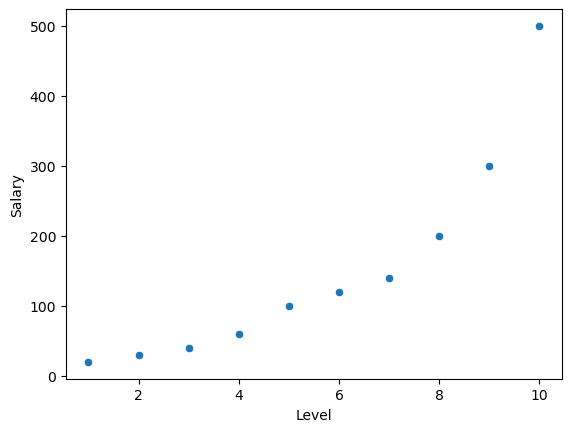

In [5]:
sns.scatterplot(data=data, x="Level", y="Salary")

In [6]:
# Try linear model first
model = LinearRegression().fit(X, y)

In [7]:
data_new = pd.read_csv("PolynomialRegression2.csv")

In [8]:
data_new

,Level,Empty_Column
0,1.5,0
1,2.5,0
2,3.5,0
3,4.5,0
4,5.5,0
5,6.5,0
6,7.5,0
7,8.5,0
8,9.5,0


In [9]:
data_predict = model.predict(data_new)

In [10]:
data_new["Salary"] = model.predict(data_new)

In [11]:
data_new

,Level,Empty_Column,Salary
0,1.5,0,-25.242424
1,2.5,0,18.818182
2,3.5,0,62.878788
3,4.5,0,106.939394
4,5.5,0,151.000000
5,6.5,0,195.060606
6,7.5,0,239.121212
7,8.5,0,283.181818
8,9.5,0,327.242424


<Axes: xlabel='Level', ylabel='Salary'>

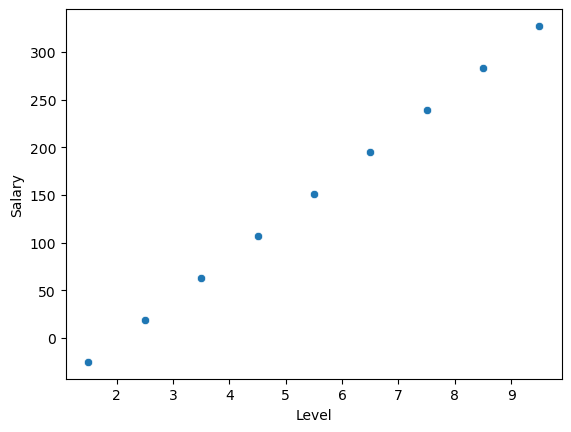

In [12]:
sns.scatterplot(data=data_new, x="Level", y="Salary")

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)

In [16]:
# Run polynomial fit and transform to add sqaured features to X
X_polynomial = polynomial.fit_transform(X)

In [46]:
# Polynomial transformation results in Numpy array.  Need to convert back to dataframe
X_polynomial = pd.DataFrame(X_polynomial)

In [47]:
X_polynomial

,0,1,2,3,4
0,1.0,0.0,1.0,0.0,0.0
1,2.0,0.0,4.0,0.0,0.0
2,3.0,0.0,9.0,0.0,0.0
3,4.0,0.0,16.0,0.0,0.0
4,5.0,0.0,25.0,0.0,0.0
5,6.0,0.0,36.0,0.0,0.0
6,7.0,0.0,49.0,0.0,0.0
7,8.0,0.0,64.0,0.0,0.0
8,9.0,0.0,81.0,0.0,0.0
9,10.0,0.0,100.0,0.0,0.0


In [48]:
polynomial_prediction = data_new.drop(["Salary"], axis=1)

In [49]:
polynomial_prediction = polynomial.transform(polynomial_prediction)

In [50]:
polynomial_prediction

array([[ 1.5 ,  0.  ,  2.25,  0.  ,  0.  ],
       [ 2.5 ,  0.  ,  6.25,  0.  ,  0.  ],
       [ 3.5 ,  0.  , 12.25,  0.  ,  0.  ],
       [ 4.5 ,  0.  , 20.25,  0.  ,  0.  ],
       [ 5.5 ,  0.  , 30.25,  0.  ,  0.  ],
       [ 6.5 ,  0.  , 42.25,  0.  ,  0.  ],
       [ 7.5 ,  0.  , 56.25,  0.  ,  0.  ],
       [ 8.5 ,  0.  , 72.25,  0.  ,  0.  ],
       [ 9.5 ,  0.  , 90.25,  0.  ,  0.  ]])

In [51]:
polynomial_prediction = pd.DataFrame(polynomial_prediction)

In [52]:
polynomial_prediction

,0,1,2,3,4
0,1.5,0.0,2.25,0.0,0.0
1,2.5,0.0,6.25,0.0,0.0
2,3.5,0.0,12.25,0.0,0.0
3,4.5,0.0,20.25,0.0,0.0
4,5.5,0.0,30.25,0.0,0.0
5,6.5,0.0,42.25,0.0,0.0
6,7.5,0.0,56.25,0.0,0.0
7,8.5,0.0,72.25,0.0,0.0
8,9.5,0.0,90.25,0.0,0.0


In [53]:
polynomial_prediction["Salary"] = model_polynomial.predict(polynomial_prediction)

In [54]:
polynomial_prediction

,0,1,2,3,4,Salary
0,1.5,0.0,2.25,0.0,0.0,35.231061
1,2.5,0.0,6.25,0.0,0.0,24.670455
2,3.5,0.0,12.25,0.0,0.0,29.715909
3,4.5,0.0,20.25,0.0,0.0,50.367424
4,5.5,0.0,30.25,0.0,0.0,86.625000
5,6.5,0.0,42.25,0.0,0.0,138.488636
6,7.5,0.0,56.25,0.0,0.0,205.958333
7,8.5,0.0,72.25,0.0,0.0,289.034091
8,9.5,0.0,90.25,0.0,0.0,387.715909
